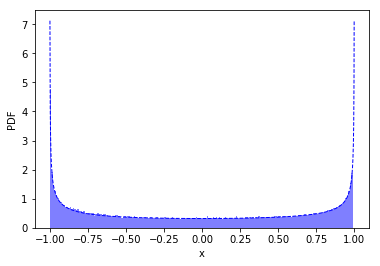

In [23]:
# On a unit circle, random points are selected. 
# What is the PDF and CDF of the x-values of these random points?

import numpy as np
import math
import matplotlib.pyplot as plt

th = np.random.uniform(0,math.pi,100000)
x = [math.cos(num) for num in th]

xx = np.arange(-0.999,0.9999,0.001)
fx = [1/(math.pi*math.sqrt(1-x*x)) for x in xx]

plt.plot(xx, fx, linewidth=1, linestyle='--', color='b')
plt.hist(x, bins=np.arange(-1, 1,0.01), facecolor='blue', alpha=0.5, density=True)
plt.xlabel('x')
plt.ylabel('PDF')
#plt.savefig('quora.png')
plt.show()

In [78]:
# Professor gives her a list of 20 questions, from which she'll randomly select 8 of those 
# exact same questions to be on the test. If she knows how to answer 14/20 questions, 
# what's the probability that she'll be able to answer at least 6 questions?
import random

# Analytical:
# probability 8 answers correct:
p8 = 14/20*13/19*12/18*11/17*10/16*9/15*8/14*7/13
# probability 7 answers correct:
p7 = 6/20*14/19*13/18*12/17*11/16*10/15*9/14*8/13*8
# probability 6 answers correct:
p6 = 6/20*5/19*14/18*13/17*12/16*11/15*10/14*9/13*(7+6+5+4+3+2+1)
ans = p8 + p7 + p6
print("Analytical answer = {0:.3f}".format(ans))

# Monte-carlo:
n = 100000 # number of simulations
questions = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0 ,0 ,0] 
ans = 0
for i in range(n):
    if sum(random.sample(questions, 8)) >= 6:
        ans = ans + 1
ans = ans/n
print("MC answer = {0:.3f}".format(ans))


Analytical answer = 0.545
MC answer = 0.543


In [59]:
# How do you establish an expected number of die rolls to get six conditioned on the numbers not decreasing?
import numpy as np
import random

# Analytical:
res_analytical = 2
print(res_analytical)

# MC:
MC = 1000000
dice = [1,2,3,4,5,6]
res = []
n = 0
roll_previous = 0
for i in range(MC):
    roll = random.sample(dice, 1)[0]
    if roll == 6:                # Found 6!
        res.append(n+1)
        n = 0
        roll_previous = 0
    else:
        if roll < roll_previous:  # restart count
            n = 0
            roll_previous = 0
        else:                     # add to counter
            roll_previous = roll
            n = n + 1
    #print(roll)
#print(res)
res_MC = sum(res)/len(res)
print(res_MC)

2
2.0019275319808685


In [53]:
# How do you establish an expected number of die rolls to get six conditioned on the numbers not decreasing?
# Continuation
def n5j(j):
    res = 0
    for i in range(0,20):
        res = res + (i+1+j)*(1/6)**(i+1) + (1/6)**i*(4/6)*res_MC
    return res
print( "n51 formula = {0:.4f}  loop = {1:0.4f}".format(1/30+1/25+2/15*res_MC, n5j(1)*1/6) )
  
def n4j(j):    
    res = 0
    for i in range(0,20):
        res = res + (i+1+j)*(1/6)**(i+1) + (1/6)**(i+1)*n5j(j+i+1) + (1/6)**i*(3/6)*res_MC
    return res
print( "n41 formula = {0:.4f}  loop = {1:0.4f}".format(1/25+7/125+19/150*res_MC, n4j(1)*1/6) )

def n3j(j):    
    res = 0
    for i in range(0,20):
        res = res + (i+1+j)*(1/6)**(i+1) + (1/6)**(i+1)*n5j(j+i+1) + (1/6)**(i+1)*n4j(j+i+1) + (1/6)**i*(2/6)*res_MC
    return res
print( "n31 formula = {0:.4f}  loop = {1:0.4f}".format(6*1/125+48/625+89/750*res_MC, n3j(1)*1/6) )

def n2j(j):    
    res = 0
    for i in range(0,20):
        res = res + (i+1+j)*(1/6)**(i+1) + (1/6)**(i+1)*n5j(j+i+1) + (1/6)**(i+1)*n4j(j+i+1) + (1/6)**(i+1)*n3j(j+i+1) + (1/6)**i*(1/6)*res_MC
    return res
print( "n21 formula = {0:.4f}  loop = {1:0.4f}".format(1*36/625+324/3125+409/3750*res_MC, n2j(1)*1/6) )

def n1j(j):    
    res = 0
    for i in range(0,20):
        res = res + (i+1+j)*(1/6)**(i+1) + (1/6)**(i+1)*n5j(j+i+1) + (1/6)**(i+1)*n4j(j+i+1) + (1/6)**(i+1)*n3j(j+i+1) + (1/6)**(i+1)*n2j(j+i+1)
    return res
print( "n11 formula = {0:.4f}  loop = {1:0.4f}".format(1*216/3125+432/3125+1829/18750*res_MC, n1j(1)*1/6) )

n51 formula = 0.3413  loop = 0.3413
n41 formula = 0.3505  loop = 0.3505
n31 formula = 0.3633  loop = 0.3633
n21 formula = 0.3805  loop = 0.3805
n11 formula = 0.4034  loop = 0.4034
